# K Means Clustering

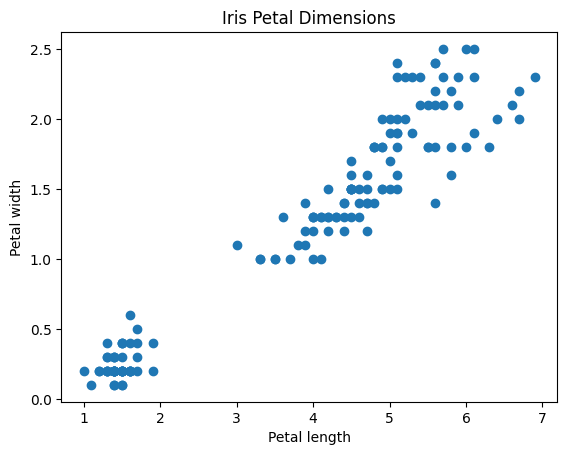

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

X = X[:,2:]

plt.scatter(X[:,0], X[:,1])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris Petal Dimensions')
plt.show()



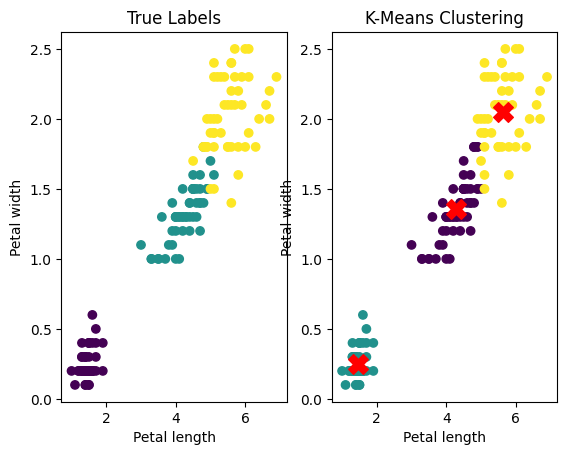

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

_, ax = plt.subplots(1, 2)
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_title('True Labels')
ax[0].set_xlabel('Petal length')
ax[0].set_ylabel('Petal width')
ax[1].scatter(X[:,0], X[:,1], c=labels)
ax[1].scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red')
ax[1].set_title('K-Means Clustering')
ax[1].set_xlabel('Petal length')
ax[1].set_ylabel('Petal width')
plt.show()


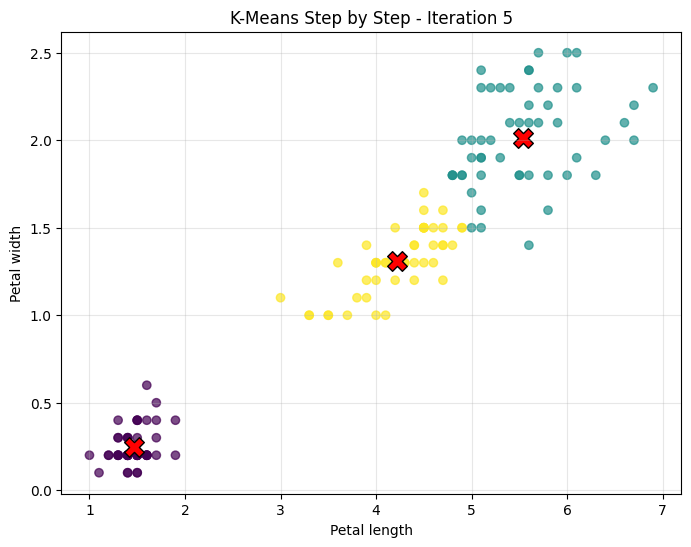

In [12]:
# Step by step K-Means
import numpy as np
import time
from IPython.display import clear_output

def kmeans_step_by_step(X, n_clusters=3, n_iterations=5):
    # np.random.seed(42)
    random_indices = np.random.choice(len(X), n_clusters, replace=False)
    centroids = X[random_indices]

    for iteration in range(n_iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        for i in range(n_clusters):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = points_in_cluster.mean(axis=0)  

        # Clear the previous output for animation effect
        clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', edgecolors='black')
        plt.title(f'K-Means Step by Step - Iteration {iteration + 1}')
        plt.xlabel('Petal length')
        plt.ylabel('Petal width')
        plt.grid(True, alpha=0.3)
        plt.show()

        time.sleep(1)  # Pause to visualize each step

    return labels, centroids

labels_ss, centroids_ss = kmeans_step_by_step(X)